In [1]:
import pyreadr
import pandas as pd
from collections import Counter

## Palleja study - antibiotics 
Using samples collected at baseline (D0), immediately after antibiotic treatment (4 d after baseline; D4) and at three further time points (8, 42 and 180 d after baseline; D8, D42 and D180, respectively)

In [2]:
palleja_data = pyreadr.read_r('real_datasets/palleja_dataset/Palleja_2019_res_mOTUs.rds')[None]
palleja_metadata = pd.read_csv('real_datasets/palleja_dataset/meta_palleja.tsv', sep = '\t')

In [5]:
palleja_data.index = [f'feature{n}' for n in range(palleja_data.shape[0])]

In [6]:
# remove timepoint 0 
filtered_palleja_metadata = palleja_metadata.query("Timepoint in [0, 4, 8]")
keep_samples = filtered_palleja_metadata.Sample_ID
filtered_palleja_data = palleja_data[keep_samples]

In [7]:
# filter counts
PA_filter = (filtered_palleja_data
             .astype(bool)
             .astype(int)
             .sum(axis=1)
             .reset_index()
             .rename({0:'N'}, axis=1)
            )

PA_filtered_data = filtered_palleja_data.loc[PA_filter[PA_filter['N'] > int(filtered_palleja_data.shape[1]*0.05)]['index']]
PA_filtered_data = PA_filtered_data.iloc[:-1]

In [8]:
# change to relative abundance
relab_data = PA_filtered_data.div(PA_filtered_data.sum(axis=0), axis=1)

# Calculate mean abundance
mean_relab_data = relab_data.mean(axis=1).reset_index().rename({0:'N'}, axis=1)

# Keep bacteria with high abundance
keep_relab_bacteria = mean_relab_data.query("N > 1e-3")['index']
RelAB_filtered_data = PA_filtered_data.loc[keep_relab_bacteria]
relab_counts = RelAB_filtered_data.div(RelAB_filtered_data.sum(axis=0), axis=1)

In [9]:
filtered_palleja_metadata.head()

,Sample_ID,Individual_ID,Timepoint,Library_size
0,ERAS1_Dag0,ERAS1,0,36059111
3,ERAS1_Dag8,ERAS1,8,47105411
4,ERAS10_Dag0,ERAS10,0,32605800
7,ERAS10_Dag8,ERAS10,8,27708254
8,ERAS11_Dag0,ERAS11,0,33813547


In [10]:
filtered_palleja_metadata = filtered_palleja_metadata.sort_values(by = ['Sample_ID']).reset_index(drop=True)
relab_counts = relab_counts.T.sort_index().T
RelAB_filtered_data = RelAB_filtered_data.T.sort_index().T

<Axes: ylabel='Count'>

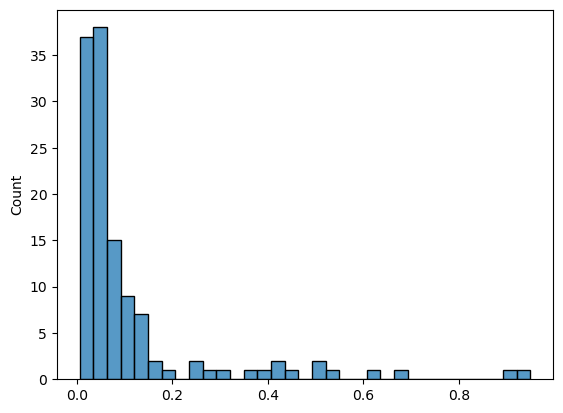

In [18]:
import seaborn as sns
sns.histplot(relab_counts.max(axis=1).sort_values())

In [9]:
# save files
filtered_palleja_metadata.to_csv("real_datasets/palleja_dataset/ready_palleja_metadata.csv")
relab_counts.to_csv("real_datasets/palleja_dataset/ready_palleja_counts.csv")
RelAB_filtered_data.to_csv("real_datasets/palleja_dataset/ready_palleja_absolute.csv")

## Mesnage

In [19]:
mesnage_data = pyreadr.read_r('real_datasets/mesnage_dataset/Mesnage_2023_res_mOTUs.rds')[None]
mesnage_metadata = pd.read_excel('real_datasets/mesnage_dataset/20230912_sample_metadata_anonymised.xlsx')

In [20]:
mesnage_data.index = [f'feature{n}' for n in range(mesnage_data.shape[0])]

In [21]:
mesnage_metadata_filtered = mesnage_metadata.query("Timepoint in ['Before', 'After'] and Type == 'Stool'")[['sample.id', 'Study_Patient', 'Timepoint']].dropna()
mesnage_data_filtered = mesnage_data[mesnage_metadata_filtered['sample.id']]

In [22]:
# filter counts
PA_filter = (mesnage_data_filtered
             .astype(bool)
             .astype(int)
             .sum(axis=1)
             .reset_index()
             .rename({0:'N'}, axis=1)
            )

PA_filtered_data = mesnage_data_filtered.loc[PA_filter[PA_filter['N'] > int(mesnage_data_filtered.shape[1]*0.05)]['index']]
PA_filtered_data = PA_filtered_data.iloc[:-1]

In [23]:
# change to relative abundance
relab_data = PA_filtered_data.div(PA_filtered_data.sum(axis=0), axis=1)

# Calculate mean abundance
mean_relab_data = relab_data.mean(axis=1).reset_index().rename({0:'N'}, axis=1)

# Keep bacteria with high abundance
keep_relab_bacteria = mean_relab_data.query("N > 1e-3")['index']
RelAB_filtered_data = PA_filtered_data.loc[keep_relab_bacteria].T
relab_counts = RelAB_filtered_data.div(RelAB_filtered_data.sum(axis=0), axis=1).T

In [24]:
mesnage_metadata_filtered = (mesnage_metadata_filtered.
                             rename({"sample.id":"Sample_ID", "Study_Patient":"Individual_ID"},
                                    axis=1)
                            )
mesnage_metadata_filtered['Timepoint'] = mesnage_metadata_filtered.Timepoint.replace({'Before':0, 'After':1})

<Axes: ylabel='Count'>

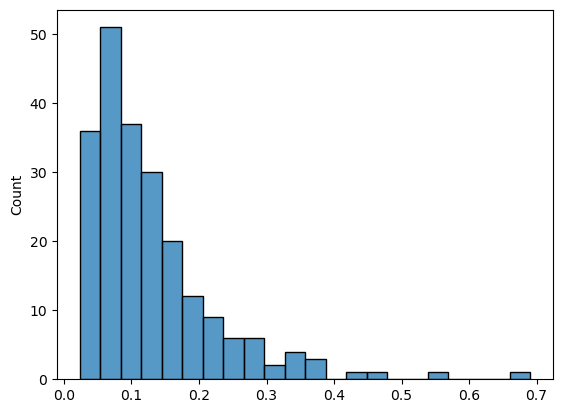

In [27]:
import seaborn as sns
sns.histplot(relab_counts.max(axis=1).sort_values())

In [16]:
# save files
mesnage_metadata_filtered.to_csv("real_datasets/mesnage_dataset/ready_mesnage_metadata.csv")
relab_counts.to_csv("real_datasets/mesnage_dataset//ready_mesnage_counts.csv")
RelAB_filtered_data.to_csv("real_datasets/mesnage_dataset//ready_mesnage_absolute.csv")

In [17]:
relab_counts.shape, relab_counts.shape, RelAB_filtered_data.shape

((220, 179), (220, 179), (179, 220))

In [19]:
mesnage_metadata_filtered

,Sample_ID,Individual_ID,Timepoint
0,zr5240_132,GEN_2,0
1,zr5240_133,GEN_3,0
2,zr5240_134,GEN_4,0
3,zr5240_135,GEN_5,0
4,zr5240_136,GEN_6,0
...,...,...,...
175,zr5240_66,OF_45,1
176,zr5240_67,OF_44,1
177,zr5240_68,OF_43,1
178,zr5240_69,OF_41,1
